##Bitcoin Price prediction using Facebook Prophet

In [1]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)


## Importing Necessary Libraries

In [2]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization

import pandas as pd
from fbprophet import Prophet 
import plotly.express as px

In [5]:
import plotly.io as pio 
pio.renderers.default = 'colab' 

In [ ]:
 #Initializing Plotly

## Importing the Dataset & Exploring it

In [8]:
from google.colab import files 
files.upload()

Saving bitcoin_data.csv to bitcoin_data (1).csv


{'bitcoin_data.csv': b'Date,Close\r\n1/1/2016,435.66\r\n1/2/2016,435.4\r\n1/3/2016,431.91\r\n1/4/2016,433.85\r\n1/5/2016,433.34\r\n1/6/2016,430.87\r\n1/7/2016,459.07\r\n1/8/2016,454.44\r\n1/9/2016,450.38\r\n1/10/2016,449.99\r\n1/11/2016,449.19\r\n1/12/2016,434.01\r\n1/13/2016,432.77\r\n1/14/2016,430.03\r\n1/15/2016,357.53\r\n1/16/2016,388.7\r\n1/17/2016,378.46\r\n1/18/2016,384.89\r\n1/19/2016,375.27\r\n1/20/2016,418.54\r\n1/21/2016,409.38\r\n1/22/2016,382.9\r\n1/23/2016,387.5\r\n1/24/2016,403.05\r\n1/25/2016,391.4\r\n1/26/2016,391.54\r\n1/27/2016,394.79\r\n1/28/2016,379.61\r\n1/29/2016,378.68\r\n1/30/2016,378.46\r\n1/31/2016,367.95\r\n2/1/2016,371.33\r\n2/2/2016,372.93\r\n2/3/2016,368.87\r\n2/4/2016,387.99\r\n2/5/2016,384.5\r\n2/6/2016,375.44\r\n2/7/2016,377.49\r\n2/8/2016,371.14\r\n2/9/2016,372.68\r\n2/10/2016,378.44\r\n2/11/2016,378.23\r\n2/12/2016,382.05\r\n2/13/2016,391\r\n2/14/2016,406.59\r\n2/15/2016,398.95\r\n2/16/2016,407.42\r\n2/17/2016,415.2\r\n2/18/2016,421.19\r\n2/19/2016,4

In [ ]:
#read_csv function from pandas

In [9]:
df = pd.read_csv("bitcoin_data.csv")
df

,Date,Close
0,1/1/2016,435.66
1,1/2/2016,435.40
2,1/3/2016,431.91
3,1/4/2016,433.85
4,1/5/2016,433.34
...,...,...
1700,8/27/2020,11329.10
1701,8/28/2020,11535.00
1702,8/29/2020,11474.30
1703,8/30/2020,11716.00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1705 non-null   object 
 1   Close   1705 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.8+ KB


In [12]:
df.describe()

,Close
count,1705.000000
mean,5455.314499
std,3962.263892
min,357.530000
25%,1062.150000
50%,6005.050000
75%,8624.280000
max,19650.010000


# Data Visualization 

In [ ]:
# Area graph (Date Vs Price)

In [13]:
px.area(df, x = 'Date', y ='Close' )

In [ ]:
# Violin plot

In [15]:
px.violin(df,y ='Close' )

# Creating Facebook Prophet Model

## Data Preperation

In [16]:
df

,Date,Close
0,1/1/2016,435.66
1,1/2/2016,435.40
2,1/3/2016,431.91
3,1/4/2016,433.85
4,1/5/2016,433.34
...,...,...
1700,8/27/2020,11329.10
1701,8/28/2020,11535.00
1702,8/29/2020,11474.30
1703,8/30/2020,11716.00


In [25]:
prophet_df = df.rename(columns = {'Date': 'ds' ,'Close': 'y'})

In [26]:
prophet_df

,ds,y
0,1/1/2016,435.66
1,1/2/2016,435.40
2,1/3/2016,431.91
3,1/4/2016,433.85
4,1/5/2016,433.34
...,...,...
1700,8/27/2020,11329.10
1701,8/28/2020,11535.00
1702,8/29/2020,11474.30
1703,8/30/2020,11716.00


## Modelling

In [27]:
m = Prophet()
m.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [28]:
future = m.make_future_dataframe(periods = 30)
forecast = m.predict(future)

In [29]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,1024.030928,9.611032,2848.274269,1024.030928,1024.030928,367.408771,367.408771,367.408771,-3.507518,-3.507518,-3.507518,370.916288,370.916288,370.916288,0.0,0.0,0.0,1391.439699
1,2016-01-02,1020.292562,-131.067677,2831.709405,1020.292562,1020.292562,346.875581,346.875581,346.875581,15.230811,15.230811,15.230811,331.644769,331.644769,331.644769,0.0,0.0,0.0,1367.168143
2,2016-01-03,1016.554196,-49.633414,2795.957780,1016.554196,1016.554196,285.749738,285.749738,285.749738,-8.815516,-8.815516,-8.815516,294.565254,294.565254,294.565254,0.0,0.0,0.0,1302.303934
3,2016-01-04,1012.815830,-200.725297,2798.158598,1012.815830,1012.815830,278.664345,278.664345,278.664345,18.789796,18.789796,18.789796,259.874549,259.874549,259.874549,0.0,0.0,0.0,1291.480175
4,2016-01-05,1009.077464,-200.329821,2652.362160,1009.077464,1009.077464,223.224561,223.224561,223.224561,-4.414476,-4.414476,-4.414476,227.639038,227.639038,227.639038,0.0,0.0,0.0,1232.302026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,2020-09-26,9075.188181,7560.178040,10568.750820,9038.484093,9132.175143,-89.368894,-89.368894,-89.368894,15.230811,15.230811,15.230811,-104.599705,-104.599705,-104.599705,0.0,0.0,0.0,8985.819287
1731,2020-09-27,9075.741437,7438.711938,10514.884715,9034.270850,9139.956762,-151.230902,-151.230902,-151.230902,-8.815516,-8.815516,-8.815516,-142.415387,-142.415387,-142.415387,0.0,0.0,0.0,8924.510535
1732,2020-09-28,9076.294693,7521.876715,10346.144415,9029.551560,9145.981602,-161.199556,-161.199556,-161.199556,18.789796,18.789796,18.789796,-179.989353,-179.989353,-179.989353,0.0,0.0,0.0,8915.095136
1733,2020-09-29,9076.847948,7357.944685,10289.348566,9024.202525,9153.656047,-221.420979,-221.420979,-221.420979,-4.414476,-4.414476,-4.414476,-217.006503,-217.006503,-217.006503,0.0,0.0,0.0,8855.426969


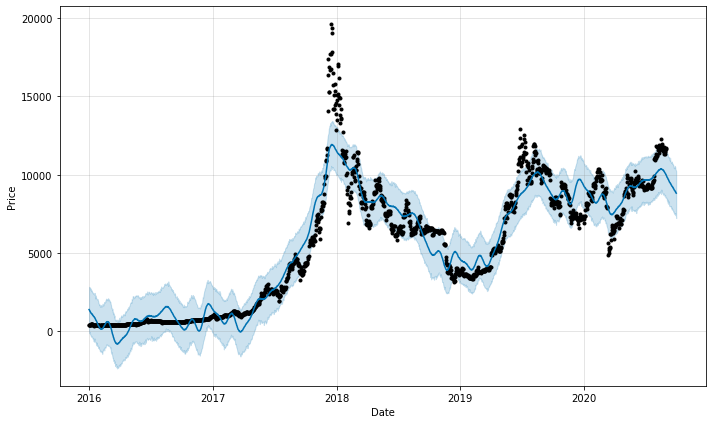

In [30]:
figure = m.plot(forecast,xlabel = 'Date', ylabel = 'Price')

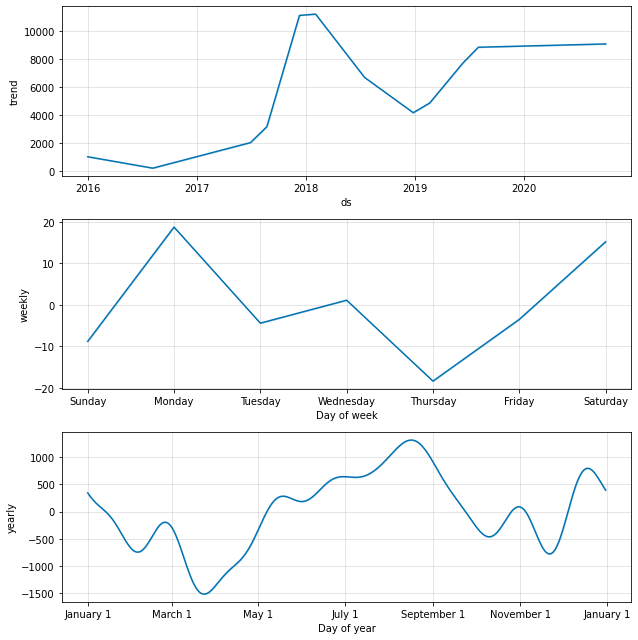

In [31]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [32]:
forecast.to_csv('forecast.csv')
from google.colab import files
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>